In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Manually view the dataset, and see if it requires any cleaning/normalization

In [27]:
#Data is normalized in data_normalization.ipynb file

## Load the dataset (csv file) into a Pandas DataFrame.

In [28]:
df = pd.read_csv("normalized_data.csv")
df

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,0,Muhammad Usman,Male,440,369,2.80,Black,March,77
1,1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...,...
123,123,M Abubakar Malik,Male,410,349,2.94,Blue,February,65
124,124,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
125,125,shafaqat ali,Male,424,400,3.07,Black,May,58
126,126,Ammar Asif,Male,351,423,2.52,Black,December,68


## Print the list of all students whose first name starts with letter the 'H'.

In [29]:
names_with_H = df["Name"].str.startswith("H", na = False)
df[names_with_H]

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
19,19,Habib Ullah,Male,399,434,3.35,Mustard,April,60
20,20,Hunain Javed,Male,362,413,2.94,Black,September,76
56,56,Hafiz Malahim Labib.,Male,390,430,3.24,Orange,May,54
57,57,HAMNA TARIQ SALEEMI,Female,400,418,2.80,Black,October,62
74,74,Hina,Female,410,350,2.90,Blue,August,67
75,75,Hamza Javed Khan,Male,400,381,3.39,Blue,January,78
77,77,Husnain Ahmed,Male,335,427,2.41,Dark blue,September,72
94,94,Hussain afzal,Male,415,346,2.87,Blue,March,81


## Print the total number of students who have a three words name (first-middle-surname).

In [30]:
import re
results = []
for name in df['Name']:
    name = re.findall(r'(\w+)(\s)(\w+)(\s)(\w+)', name)
    if name != []:
        jsonObj = {"name":name[0][0] + name[0][1] + name[0][2] + name[0][3] + name[0][4]}
        results.append(jsonObj)
    
df2 = pd.DataFrame(results)
df2

,name
0,Syeda Maham Gillani
1,Muhammad Subhan Khan
2,SARMAD WAHEED AHMED
3,M Hassaan Lateef
4,Ahmed Amjad Dar
5,Muhammad Ibrahim Khalil
6,Muhammad saim jamil
7,Ahmar Hafeez Khan
8,Muhammad Umar Asghar
9,MUHAMMAD HAIDER AWAN


## Print the percentage of students who have a CGPA of 3.0 or above.

In [31]:
count = 0
for cgpa in df['CGPA']:
    if float(cgpa) >= 3.0:
        count+=1
        
perc = count / len(df['CGPA']) *100

print("The percentage of students who have CGPA of 3.0 or above is " + str(float("{:.2f}".format(perc))) + "%")

The percentage of students who have CGPA of 3.0 or above is 26.56%


## Plot a pie chart to show the ratio of male and female students.

Male = 108
Female = 20


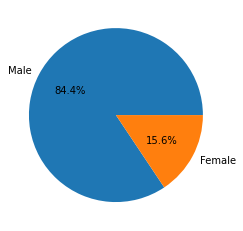

In [32]:
male_count = 0
female_count = 0

for gender in df['Gender']:
    if gender == "Male":
        male_count+=1
    else:
        female_count+=1
        
print("Male = " + str(male_count))
print("Female = " + str(female_count))

labels = ['Male', 'Female']
data = [male_count, female_count]
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.show()

## Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

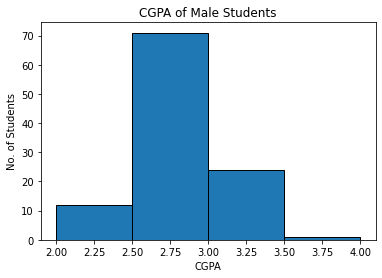

In [33]:
results = []

for gpa, gender in zip(df['CGPA'], df['Gender']):
    # if gender == 'Male':
    #     if (float(gpa) >= 2.00 and float(gpa)<= 2.50):
    #         results[0] += 1
    #     elif (float(gpa) >= 2.51 and float(gpa)<= 3.00):
    #         results[1] += 1 
    #     elif (float(gpa) >= 3.01 and float(gpa)<= 3.50):
    #         results[2] += 1
    #     else:
    #         results[3] += 1
    if gender == 'Male':
        results.append(gpa)
    
plt.hist(results, edgecolor='black', bins=[2, 2.5, 3.0, 3.5, 4])
# plt.grid()
plt.title('CGPA of Male Students', fontsize=12)
plt.xlabel('CGPA', fontsize=10)
plt.ylabel('No. of Students', fontsize=10)
plt.show()

## Plot the HSSC-1 marks of all male vs female students on a scatter plot.

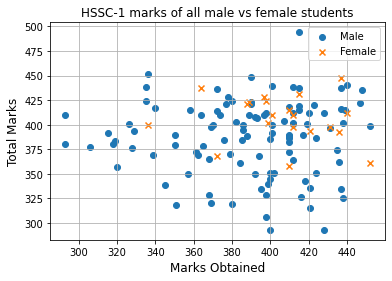

In [34]:
male_marks = []
female_marks = []

for gender, marks in zip(df['Gender'], df['HSSC-1']):
    if gender == 'Male':
        male_marks.append(marks)
    else:
         female_marks.append(marks)
            
i = 0
x = len(df['HSSC-1']) - len(male_marks)
while (i < x):
    male_marks.append('NaN')
    i+=1

i = 0
x = len(df['HSSC-1']) - len(female_marks)
while (i < x):
    female_marks.append('NaN')
    i+=1
    

grades_range = df['HSSC-1']

# print(male_marks)
# print(female_marks)

# print(len(male_marks))
# print(len(female_marks))
# print(len(grades_range))
    
plt.scatter(grades_range, male_marks, marker='o')
plt.scatter(grades_range,female_marks, marker='x')
plt.xlabel('Marks Obtained', fontsize=12)
plt.ylabel('Total Marks', fontsize=12)
plt.title("HSSC-1 marks of all male vs female students", fontsize=12)
plt.legend(["Male" , "Female"])
plt.grid(True)
plt.show()


## Plot the favorite colors of male vs female students on a bar chart.

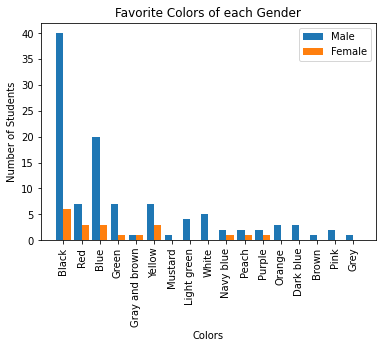

In [35]:
x = df['FavoriteColor'].unique()
jsonObj = {"Color":x}
df2 = pd.DataFrame(x) 
df2 = pd.DataFrame(jsonObj)
df2

male = []
female = []
for color in df2['Color']:
    male_frequency = 0
    female_frequency = 0
    for clr, gndr in zip(df['FavoriteColor'], df['Gender']):
        if color == clr:
            if(gndr == "Male"):
                male_frequency+=1
            else:
                female_frequency+=1
    male.append(male_frequency)
    female.append(female_frequency)
    
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')
  
plt.xticks(X_axis, x, rotation='vertical')
plt.xlabel("Colors")
plt.ylabel("Number of Students")
plt.title("Favorite Colors of each Gender")
plt.legend()
plt.show()

## Plot line chart of students and their birth months.

[7, 18, 18, 5, 7, 4, 6, 7, 10, 27, 9, 8]


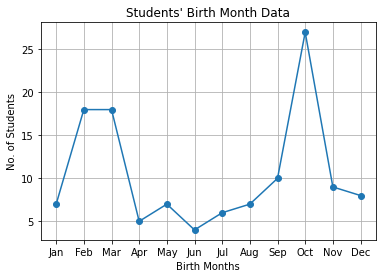

In [36]:
# results_dic =	{
#     "January": 0,
#     "Feburary": 0,
#     "March": 0,
#     "April": 0,
#     "May": 0, 
#     "June": 0,
#     "July": 0, 
#     "August": 0,
#     "September": 0,
#     "October": 0,
#     "November": 0,
#     "December": 0,
# }

results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


for month in df['BirthMonth']:
    if month == 'January':
        results[0] += 1
    elif month == 'February':
        results[1] += 1
    elif month == 'March':
        results[2] += 1
    elif month == 'April':
        results[3] += 1
    elif month == 'May':
        results[4] += 1
    elif month == 'June':
        results[5] += 1
    elif month == 'July':
        results[6] += 1
    elif month == 'August':
        results[7] += 1
    elif month == 'September':
        results[8] += 1
    elif month == 'October':
        results[9] += 1
    elif month == 'November':
        results[10] += 1
    elif month == 'December':
        results[11] += 1
    
print(results)
# print(df['BirthMonth'].unique())
x = np.arange(start=1, stop=13, step = 1)
my_xticks = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, my_xticks)
plt.plot(x, results, marker='o')
plt.title("Students' Birth Month Data")
plt.xlabel("Birth Months")
plt.ylabel("No. of Students")
plt.grid(True)
plt.show()

## Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

Dataframe is : 
       x    y
0    440  369
1    415  408
2    388  321
3    412  440
4    364  469
..   ...  ...
123  410  349
124  403  390
125  424  400
126  351  423
127  361  335

[128 rows x 2 columns]
Correlation matrix is : 
          x         y
x  1.000000 -0.157301
y -0.157301  1.000000


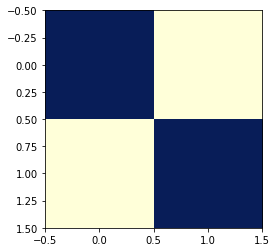

In [37]:
x = np.array(df['HSSC-1'])
y = np.array(df['HSSC-2'])

data = {
    'x': np.array(df['HSSC-1']),
    'y':  np.array(df['HSSC-2'])
}

dataframe = pd.DataFrame(data, columns=['x', 'y'])
print("Dataframe is : ")
print(dataframe)

matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)

plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
plt.show()

## Bonus points: What other things (insights) you can get from the dataset?
### 1. CGPA of Male vs Female students
### 2. Bar Graph of Weights of Students
### 3. Correlation between HSSC-1 and HSSC-2 total marks and CGPA of students